<b><h2>Scraping the Ligue One scoreboard with Selenium</b></h2>

<h3>Importing libraries</h3>

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import Image

<h3>The source code:</h3>

In [43]:
Image(url="psg1.png",width=1500, height=500)

<h3><br>Writing a script that scrapes all of the chosen data:</br></h3>

1. First a connection with the website was established</br>
2. Then driver.implicitly_wait was used for the page to load before proceeding further</br>
3. The script found all elements within each row that contains data about football team and their stastistics (goals, points etc.)</br>
4. An object that stores all of the table rows was created (ligue1)</br>
5. The script looped through ligue1 and gathered the data containing information about each team</br>
6. The scraped data was appended and used to create a dataframe out of it</br>

In [51]:
# connect to the webdriver
PATH = 'C:\webdrivers\chromedriver.exe'
driver = webdriver.Chrome(PATH)
# connect to the website
driver.get('https://www.flashscore.pl/pilka-nozna/francja/ligue-1/tabela/#/zmkW5aIi/table/overall')
# wait up to 10 second for the page to load before acquiring further information
driver.implicitly_wait(10)
# navigate the "accept cookies" button and click it 
driver.find_element(By.XPATH,'//*[@id="onetrust-accept-btn-handler"]').click()
# find all rows that contain information about each team in the scoreboard
ligue1 = driver.find_elements(By.CLASS_NAME,'ui-table__row')
# create a blank object that will be used later to append scraped data from the loop
table =[]
for i in ligue1:
    rank = i.find_element(By.CLASS_NAME,'tableCellRank').text
    team = i.find_element(By.CLASS_NAME,'tableCellParticipant__name').text
    matches_played = i.find_element(By.CLASS_NAME,'table__cell--value').text
    # matches_won,matches_tied,matches_lost are siblings: they have the same tag and class
    # therefore it was needed to adress each of them by their index
    # otherwise only the first sibling (matches_played) would be printed out.
    matches_won = i.find_element(By.XPATH,'.//span[@class=" table__cell table__cell--value   "][2]').text
    matches_tied = i.find_element(By.XPATH,'.//span[@class=" table__cell table__cell--value   "][3]').text
    matches_lost = i.find_element(By.XPATH,'.//span[@class=" table__cell table__cell--value   "][4]').text
    goal_balance = i.find_element(By.XPATH,'.//span[@class=" table__cell table__cell--value  table__cell--score "]').text
    points = i.find_element(By.XPATH,'.//span[@class=" table__cell table__cell--value  table__cell--points "]').text
    table.append(
        {'rank':rank,
         'team':team,
         'matches_played':matches_played,
         'matches_won':matches_won,
         'matches_tied':matches_tied,
         'matches_lost':matches_lost,
         'goal_balance':goal_balance,
         'points':points}
         )


C:\Users\piotr\AppData\Local\Temp\ipykernel_17760\180163310.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


<h3>The dataframe:</h3>

In [52]:
table_df = pd.DataFrame(table)
table_df

,rank,team,matches_played,matches_won,matches_tied,matches_lost,goal_balance,points
0,1.,PSG,28,21,3,4,68:28,66
1,2.,Marsylia,29,18,6,5,54:29,60
2,3.,Lens,28,16,9,3,47:21,57
3,4.,Monaco,28,16,6,6,57:37,54
4,5.,Rennes,28,15,5,8,47:29,50
5,6.,Lille,28,14,7,7,51:36,49
6,7.,Nice,28,11,11,6,37:25,44
7,8.,Lorient,28,12,8,8,41:37,44
8,9.,Reims,28,10,13,5,36:28,43
9,10.,Lyon,28,11,8,9,43:32,41


<h3>All of the variables are stored as objects, which has to be changed, e.g by apply function</h3>

In [53]:
table_df.dtypes

rank              object
team              object
matches_played    object
matches_won       object
matches_tied      object
matches_lost      object
goal_balance      object
points            object
dtype: object

In [54]:
table_df = table_df.apply(pd.to_numeric,errors='ignore')

In [55]:
table_df.dtypes


rank              float64
team               object
matches_played      int64
matches_won         int64
matches_tied        int64
matches_lost        int64
goal_balance       object
points              int64
dtype: object

<h3>Next additional columns that store information about scored and conceded goals were created by splitting the 'matches_goal_balance' column</h3>

In [57]:
table_df['goals_scored'] = table_df['goal_balance'].apply(lambda x: x.split(':')[0])
table_df['goals_conceded'] = table_df['goal_balance'].apply(lambda x: x.split(':')[1])

In [58]:
table_df[['goals_scored','goals_conceded']] = table_df[['goals_scored','goals_conceded']].astype('int')

In [59]:
table_df.head(10)

,rank,team,matches_played,matches_won,matches_tied,matches_lost,goal_balance,points,goals_scored,goals_conceded
0,1.0,PSG,28,21,3,4,68:28,66,68,28
1,2.0,Marsylia,29,18,6,5,54:29,60,54,29
2,3.0,Lens,28,16,9,3,47:21,57,47,21
3,4.0,Monaco,28,16,6,6,57:37,54,57,37
4,5.0,Rennes,28,15,5,8,47:29,50,47,29
5,6.0,Lille,28,14,7,7,51:36,49,51,36
6,7.0,Nice,28,11,11,6,37:25,44,37,25
7,8.0,Lorient,28,12,8,8,41:37,44,41,37
8,9.0,Reims,28,10,13,5,36:28,43,36,28
9,10.0,Lyon,28,11,8,9,43:32,41,43,32


<h3>Plotting the data</h3>

[Text(0, 0, '68'),
 Text(0, 0, '57'),
 Text(0, 0, '54'),
 Text(0, 0, '51'),
 Text(0, 0, '47'),
 Text(0, 0, '47'),
 Text(0, 0, '45'),
 Text(0, 0, '43'),
 Text(0, 0, '43'),
 Text(0, 0, '41'),
 Text(0, 0, '38'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '34'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '23'),
 Text(0, 0, '21'),
 Text(0, 0, '20')]

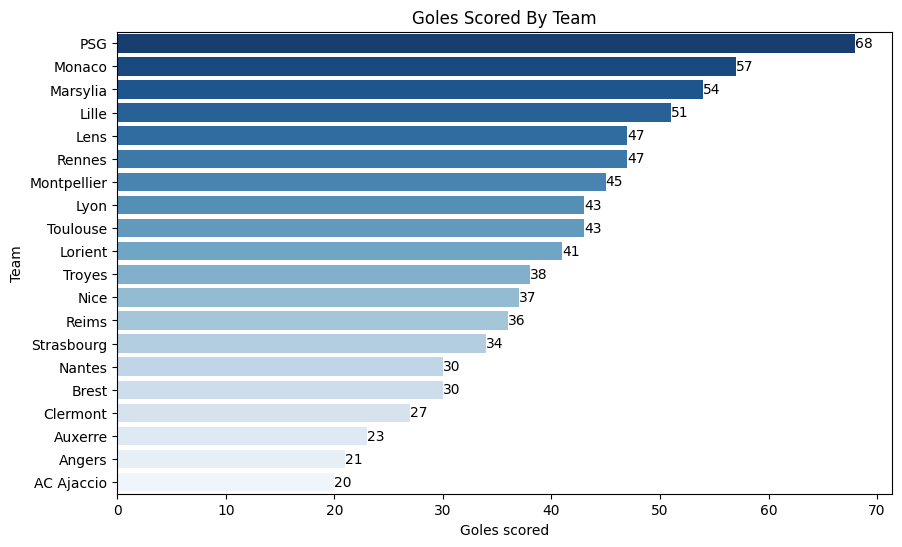

In [60]:
plt.figure(figsize=(10,6))
bar = sns.barplot(data=table_df.sort_values('goals_scored',ascending=False),
            y='team',
            x='goals_scored',
            palette=sns.color_palette('Blues_r',20))
plt.title('Goles Scored By Team')
plt.xlabel('Goles scored')
plt.ylabel('Team')
plt.bar_label(bar.containers[0])

In [62]:
table_df['win_ratio'] = table_df['matches_won']/table_df['matches_played']

In [63]:
table_df['win_ratio'] = table_df['win_ratio'].round(2)

In [64]:
table_df.head(3)

,rank,team,matches_played,matches_won,matches_tied,matches_lost,goal_balance,points,goals_scored,goals_conceded,win_ratio
0,1.0,PSG,28,21,3,4,68:28,66,68,28,0.75
1,2.0,Marsylia,29,18,6,5,54:29,60,54,29,0.62
2,3.0,Lens,28,16,9,3,47:21,57,47,21,0.57


Text(0, 0.5, 'Won matches')

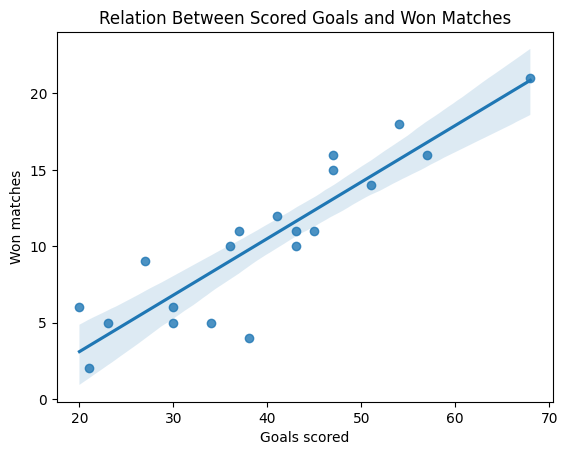

In [71]:
sns.regplot(data=table_df,
                x='goals_scored',
                y='matches_won')
plt.title('Relation Between Scored Goals and Won Matches')
plt.xlabel('Goals scored')
plt.ylabel('Won matches')